# 광고 클릭율 데이터 분석

## 데이터 불러오기
- kaggle의 Click-Through Rate Prediction 데이터 사용

In [1]:
import pandas as pd

data = pd.read_csv('data/ads_data.csv')
# print(data)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB
None


## 데이터 설명
|컬럼|내용|
|------------------------|------------------------------------|
|Daily Time Spent on Site|사용자가 사이트에서 보낸 시간 (분)|
|Age|사용자 나이|
|Area Income|사용자가 살고 있는 지역의 평균 수입|
|Daily Internet Usage|하루 인터넷 사용 시간 (분)|
|Ad Topic Line|광고 제목|
|City|사용자 거주 도시|
|Gender|성별|
|Country|사용자 국가|
|Timestamp|광고 노출 시간|
|Clicked on Ad|광고 클릭 여부 (0 : 클릭 안함, 1 : 클릭)|

## 데이터 정리
- Timestamp를 datetime 형태로 변환

In [2]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [3]:
print(data.head())

   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country           Timestamp  Clicked on Ad  
0  Svalbard & Jan Mayen Islands 2016-06-09 21:43:05              0  
1                     Sing

## A/B Test

### 1. 성별에 따른 광고 클릭률
- A 그룹 : 남성 사용자
- B 그룹 : 여성 사용자
- 비교 지표 : 광고 클릭률(Clicked on Ad)

**가설**
- 귀무가설 : 성별에 따라 광고 클릭률에 차이가 없다
- 대립가설 : 성별에 따라 광고 클릭률에 차이가 있다

**가설 설정 이유**
- 성별이 광고 클릭에 영향을 미치는지 확인

In [4]:
male = data[data['Gender'] == 'Male']
female = data[data['Gender'] == 'Female']

male_click_rate = male['Clicked on Ad'].mean()
female_click_rate = female['Clicked on Ad'].mean()
# print(male_click_rate, female_click_rate)

# t-test 수행 (두 그룹의 클릭률 차이 검정)
from scipy.stats import ttest_ind
ttest, p_value = ttest_ind(male['Clicked on Ad'], female['Clicked on Ad'])
print(f"Male Click Rate: {male_click_rate:.2f}")
print(f"Female Click Rate: {female_click_rate:.2f}")
print(f"T-statistic: {ttest:.2f}, P-value: {p_value:.4f}")

# p_value 가설 해설
if p_value < 0.05:
    print('성별에 따른 클릭률에 통계적으로 유의미한 차이가 있습니다.')
    print('대립가설 : 성별에 따라 광고 클릭률에 차이가 있습니다.')
else:
    print('성별에 따른 클릭률에 통계적으로 유의미한 차이가 없습니다.')
    print('귀무가설 : 성별에 따라 광고 클릭률에 차이가 없습니다.')

Male Click Rate: 0.46
Female Click Rate: 0.51
T-statistic: -4.97, P-value: 0.0000
성별에 따른 클릭률에 통계적으로 유의미한 차이가 있습니다.
대립가설 : 성별에 따라 광고 클릭률에 차이가 있습니다.


#### Cohen's d값 확인

In [5]:
import numpy as np

mean_diff = np.abs(male_click_rate - female_click_rate)
std = np.sqrt(((male['Clicked on Ad'].std() ** 2) + (female['Clicked on Ad'].std() ** 2)) / 2)
cohen_d = mean_diff / std

print(f"Cohen's d: {cohen_d:.2f}")

Cohen's d: 0.10


**통계적으로는 유의미하나, 효과 크기는 0.1로 매우 작다. 따라서 전략에 큰 영향을 미칠 가능성이 매우 적다**

### 2. 연령별 광고 클릭률

**가설**
- 귀무가설 : 연령대별 클릭률 차이 없다
- 대립가설 : 연령대별 클릭률 차이 있다 

In [6]:
from scipy import stats

g1 = data[(data['Age'] < 25)]['Clicked on Ad']
g2 = data[(data['Age'] >= 25) & (data['Age'] < 30)]['Clicked on Ad']
g3 = data[(data['Age'] >= 30) & (data['Age'] < 35)]['Clicked on Ad']
g4 = data[(data['Age'] >= 35) & (data['Age'] < 40)]['Clicked on Ad']
g5 = data[(data['Age'] >= 40) & (data['Age'] < 45)]['Clicked on Ad']
g6 = data[(data['Age'] >= 45)]['Clicked on Ad']

f_stat, p_value = stats.f_oneway(g1, g2, g3, g4, g5, g6)

print(f'stats: {f_stat:.4f}')
print(f'pvalue: {p_value:.4f}')

if p_value < 0.05:
    print('귀무가설 기각 -> 연령대별로 클릭률 차이 있다')
else:
    print('귀무가설 채택 -> 연령대별 클릭률 차이 없다')


stats: 578.1662
pvalue: 0.0000
귀무가설 기각 -> 연령대별로 클릭률 차이 있다


### Tukey's HSD (사후 검정)

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def age_group(age):
    if age < 25:
        return 'group 1'
    elif age < 30:
        return 'group 2'
    elif age < 35:
        return 'group 3'
    elif age < 40:
        return 'group 4'
    elif age < 45:
        return 'group 5'
    else:
        return 'group 6'

data['Age_Group'] = data['Age'].apply(age_group)

tukey_result = pairwise_tukeyhsd(
    endog = data['Clicked on Ad'],
    groups = data['Age_Group'],
    alpha = 0.05
)

result = tukey_result.summary()
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group 1 group 2  -0.0599 0.0151 -0.1126 -0.0073   True
group 1 group 3   0.0233 0.7975 -0.0287  0.0753  False
group 1 group 4    0.168    0.0  0.1162  0.2197   True
group 1 group 5   0.4508    0.0  0.3961  0.5055   True
group 1 group 6   0.5703    0.0  0.5174  0.6231   True
group 2 group 3   0.0832    0.0  0.0427  0.1238   True
group 2 group 4   0.2279    0.0  0.1876  0.2681   True
group 2 group 5   0.5108    0.0  0.4668  0.5548   True
group 2 group 6   0.6302    0.0  0.5886  0.6718   True
group 3 group 4   0.1446    0.0  0.1053   0.184   True
group 3 group 5   0.4275    0.0  0.3844  0.4707   True
group 3 group 6    0.547    0.0  0.5062  0.5877   True
group 4 group 5   0.2829    0.0    0.24  0.3257   True
group 4 group 6   0.4023    0.0  0.3619  0.4427   True
group 5 group 6   0.1195    0.0  0.0753  0.1636   True
----------

**group 1 과 group 3 의 reject가 False 이기 때문에 유의미한 차이가 없다. 하지만 다른 모든 것은 유의미한 차이가 있는것을 확인 할 수 있다**

### 결과 시각화

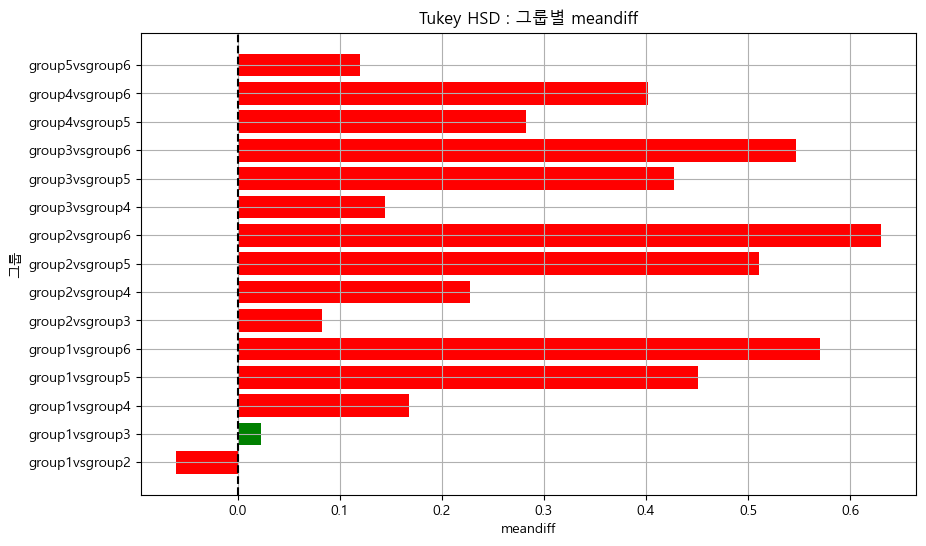

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='Malgun Gothic')

t_r = {
    'group1' : ['group1', 'group1', 'group1', 'group1', 'group1', 'group2', 'group2', 'group2', 'group2', 'group3', 'group3', 'group3', 'group4', 'group4', 'group5'],
    'group2' : ['group2', 'group3', 'group4', 'group5', 'group6', 'group3', 'group4', 'group5', 'group6', 'group4', 'group5', 'group6', 'group5', 'group6', 'group6'],
    'meandiff' : [-0.0599, 0.0233, 0.168, 0.4508, 0.5703, 0.0832, 0.2279, 0.5108, 0.6302, 0.1446, 0.4275, 0.547, 0.2829, 0.4023, 0.1195],
    'p_adj' : [0.0151, 0.7975, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'reject' : [True, False, True, True, True, True, True, True, True, True, True, True, True, True, True]
}

df_tukey = pd.DataFrame(t_r)

colors = ['red' if reject else 'green' for reject in df_tukey['reject']]

plt.figure(figsize=(10, 6))

plt.barh(df_tukey['group1'] + 'vs' + df_tukey['group2'], df_tukey['meandiff'], color = colors)

plt.axvline(x = 0, color = 'black', linestyle = '--')
plt.title('Tukey HSD : 그룹별 meandiff')
plt.xlabel('meandiff')
plt.ylabel('그룹')
plt.grid(True)
plt.show()

### 3. 인터넷 사용 시간에 따른 광고 클릭률
**가설**
- 귀무가설 : 인터넷 사용 시간이 다른 그룹 간 광고 클릭률 차이가 없다.
- 대립가설 : 인터넷 사용 시간이 다른 그룹 간 광고 클릭률 차이가 있다.

**그룹**
- A : 하루 인터넷 사용 시간이 적은 그룹 (평균 이하)
- B : 하루 인터넷 사용 시간이 많은 그룹 (평균 초과)

In [22]:
from scipy import stats

avg_usage = data['Daily Internet Usage'].mean()
group_a = data[data['Daily Internet Usage'] <= avg_usage]['Clicked on Ad']
group_b = data[data['Daily Internet Usage'] > avg_usage]['Clicked on Ad']

print(group_a.shape[0], group_b.shape[0])

# 정규성 검정
print('Shapiro A pvalue: ', round(stats.shapiro(group_a).pvalue, 4))
print('Shapiro B pvalue: ', round(stats.shapiro(group_b).pvalue, 4))

# 등분산 검정
print('Levene pvalue: ', round(stats.levene(group_a, group_b).pvalue, 4))

4858 5142
Shapiro A pvalue:  0.0
Shapiro B pvalue:  0.0
Levene pvalue:  0.1967


**정규성 검정 결과 정규성을 가정할 수 없고 등분산 검정 결과 등분산성이 확보됨. 샘플수가 4858, 5142개로 샘플 수가 크므로 중심극한정리에 의해 t-test 진행**

In [24]:
t_stat, pvalue = stats.ttest_ind(group_a, group_b, equal_var = True)
print('t_statistic: ', round(t_stat, 4))
print('p_value: ', round(pvalue, 4))

if p_value < 0.05:
    print('귀무가설 기각 -> 인터넷 사용 시간에 따라 클릭률에 유의미한 차이 있음')
else:
    print('귀무가설 채택 -> 클릭률 차이 없음')

t_statistic:  13.5001
p_value:  0.0
귀무가설 기각 -> 인터넷 사용 시간에 따라 클릭률에 유의미한 차이 있음


In [25]:
import numpy as np

cohen_d = np.abs(group_a.mean() - group_b.mean()) / np.sqrt((group_a.std() ** 2 + group_b.std() ** 2) / 2)
print("Cohen's d: ", round(cohen_d, 2))

Cohen's d:  0.27


**통계적으로는 유의미하나, 효과 크기는 0.27로 매우 작다. 따라서 전략에 큰 영향을 미칠 가능성이 매우 적다**

### 결과 시각화

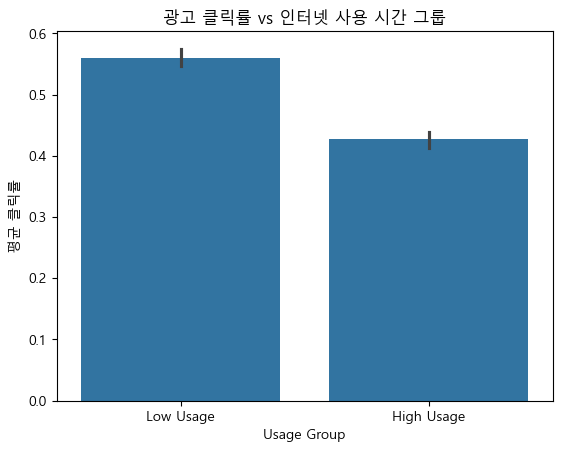

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

df = data.copy()
df['Usage Group'] = np.where(df['Daily Internet Usage'] <= avg_usage, 'Low Usage', 'High Usage')

sns.barplot(x = 'Usage Group', y = 'Clicked on Ad', data = df, errorbar=('ci', 95))
plt.title("광고 클릭률 vs 인터넷 사용 시간 그룹")
plt.ylabel("평균 클릭률")
plt.show()

### 4. 시간에 따른 광고 클릭률 분석
- 새벽, 아침, 낮, 저녁, 밤
- 평일, 주말

#### 시간대 별 광고 클릭률

In [40]:
# 시간대 분류 함수
def time(hour):
    if 0 <= hour < 5:
        return '새벽'
    elif 5 <= hour < 9:
        return '아침'
    elif 9 <= hour < 18:
        return '낮'
    elif 18 <= hour < 21:
        return '저녁'
    else:
        return '밤'

data['시간대'] = data['Timestamp'].dt.hour.apply(time)

data['평일/주말'] = data['Timestamp'].dt.dayofweek.apply(lambda x: '주말' if x >= 5 else '평일')

# print(data.head())

**가설**
- 귀무가설 : 시간대별 광고 클릭률 차이가 없음
- 대립가설 : 시간대별 광고 클릭률 차이가 있음

In [39]:
from scipy import stats

dawn = data[data['시간대'] == '새벽']['Clicked on Ad']
morning = data[data['시간대'] == '아침']['Clicked on Ad']
noon = data[data['시간대'] == '낮']['Clicked on Ad']
evening = data[data['시간대'] == '저녁']['Clicked on Ad']
night = data[data['시간대'] == '밤']['Clicked on Ad']

f_stat, p_value = stats.f_oneway(dawn, morning, noon, evening, night)

print('statistic: ', round(f_stat, 4))
print('p_value: ', round(p_value, 4))

if p_value < 0.05:
    print('귀무가설 기각 -> 시간대별 광고 클릭률에 차이가 있음')
else:
    print('귀무가설 채택 -> 시간대별 광고 클릭률에 차이가 없음')

statistic:  56.7107
p_value:  0.0
귀무가설 기각 -> 시간대별 광고 클릭률에 차이가 있음


#### Tukey HSD 사후 검정

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_data = data[['시간대', 'Clicked on Ad']]

tukey_result = pairwise_tukeyhsd(
    endog = tukey_data['Clicked on Ad'],
    groups = tukey_data['시간대'],
    alpha = 0.05
)

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     낮      밤     0.03 0.2413 -0.0099    0.07  False
     낮     새벽  -0.1773    0.0 -0.2146   -0.14   True
     낮     아침  -0.0777    0.0 -0.1216 -0.0338   True
     낮     저녁  -0.0072 0.9908 -0.0499  0.0355  False
     밤     새벽  -0.2074    0.0 -0.2521 -0.1627   True
     밤     아침  -0.1077    0.0 -0.1581 -0.0574   True
     밤     저녁  -0.0372 0.2376 -0.0866  0.0121  False
    새벽     아침   0.0996    0.0  0.0513  0.1479   True
    새벽     저녁   0.1701    0.0  0.1229  0.2173   True
    아침     저녁   0.0705 0.0024  0.0179  0.1231   True
----------------------------------------------------


**(낮, 밤), (낮, 저녁), (밤, 저녁)의 reject가 False 이기 때문에 유의미한 차이가 없다. 하지만 다른 모든 것은 유의미한 차이가 있는것을 확인 할 수 있다.**

#### 시각화

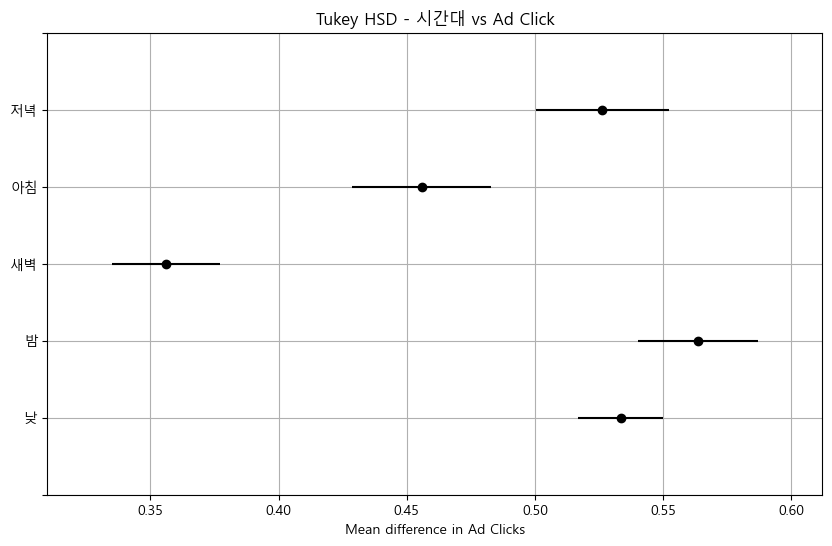

In [49]:
import matplotlib.pyplot as plt

tukey_result.plot_simultaneous()
plt.title("Tukey HSD - 시간대 vs Ad Click")
plt.xlabel("Mean difference in Ad Clicks")
plt.grid(True)
plt.show()

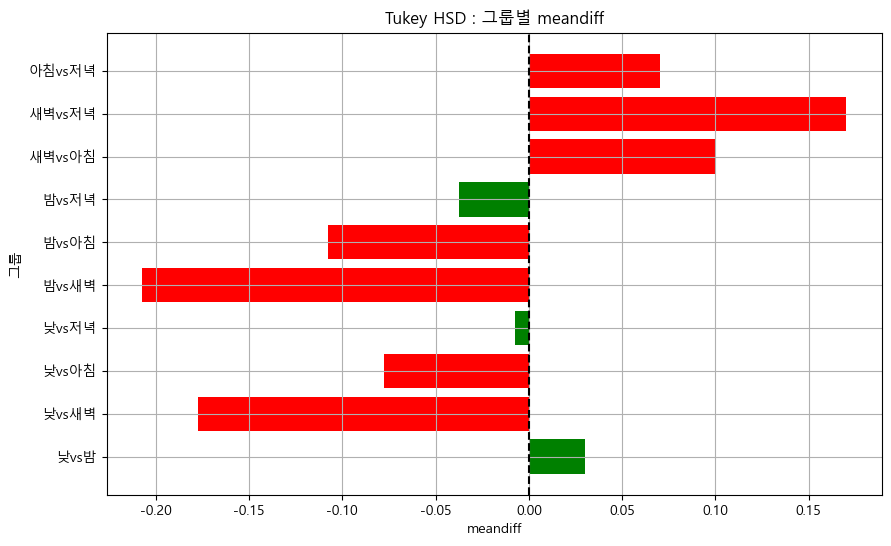

In [50]:
import matplotlib

plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

t_r = {
    'group1' : ['낮', '낮', '낮', '낮', '밤', '밤', '밤', '새벽', '새벽', '아침'],
    'group2' : ['밤', '새벽', '아침', '저녁', '새벽', '아침', '저녁', '아침', '저녁', '저녁'],
    'meandiff' : [0.03, -0.1773, -0.0777, -0.0072, -0.2074, -0.1077, -0.0372, 0.0996, 0.1701, 0.0705],
    'p_adj' : [0.2413, 0.0, 0.0, 0.9908, 0.0, 0.0, 0.2376, 0.0, 0.0, 0.0024],
    'reject' : [False, True, True, False, True, True, False, True, True, True]
}

df_tukey = pd.DataFrame(t_r)

colors = ['red' if reject else 'green' for reject in df_tukey['reject']]

plt.figure(figsize=(10, 6))

plt.barh(df_tukey['group1'] + 'vs' + df_tukey['group2'], df_tukey['meandiff'], color = colors)

plt.axvline(x = 0, color = 'black', linestyle = '--')
plt.title('Tukey HSD : 그룹별 meandiff')
plt.xlabel('meandiff')
plt.ylabel('그룹')
plt.grid(True)
plt.show()

#### 평일/주말에 따른 광고 클릭률 분석

In [58]:
weekday = data[data['평일/주말'] == '평일']['Clicked on Ad']
weekend = data[data['평일/주말'] == '주말']['Clicked on Ad']

print(weekday.shape[0], weekend.shape[0])

# 정규성 검정
print('shapiro_weekday: ', round(stats.shapiro(weekday).pvalue, 4))
print('shapiro_weekend: ', round(stats.shapiro(weekend).pvalue, 4))

# 등분산 검정
print('levene: ', round(stats.levene(weekday, weekend).pvalue, 4))

t_stat, p_value = stats.ttest_ind(weekday, weekend, equal_var = True)

print('stats: ', round(t_stat, 4))
print('p_value: ', round(p_value, 4))

if p_value < 0.05:
    print('귀무가설 기각 -> 평일과 주말의 광고 클릭률은 차이가 있다')
else:
    print('귀무가설 채택 -> 평일과 주말의 광고 클릭률은 차이가 없다')

7110 2890
shapiro_weekday:  0.0
shapiro_weekend:  0.0
levene:  0.8951
stats:  -0.1318
p_value:  0.8951
귀무가설 채택 -> 평일과 주말의 광고 클릭률은 차이가 없다


### 5. 소득에 따른 광고 반응 차이
- 고소득군, 저소득군 클릭률 비교
- Area Incom 기준 상하위 50%나누어 A/B 테스트 진행

In [62]:
# 중앙값 기준으로 나누기
median_income = data['Area Income'].median()
print(data['Area Income'].max(), data['Area Income'].min(), median_income)

low_income = data[data['Area Income'] < median_income]
high_income = data[data['Area Income'] >= median_income]

79332.33 13996.5 56180.93


In [63]:
import statsmodels.api as sm

clicks = [low_income['Clicked on Ad'].sum(), high_income['Clicked on Ad'].sum()]
n = [low_income.shape[0], high_income.shape[0]]

# 이항 비율 검정
z_stat, p_value = sm.stats.proportions_ztest(clicks, n)
print('z_stat: ', round(z_stat, 4))
print('p_value: ', round(p_value, 4))

if p_value < 0.05:
    print('귀무가설 기각 -> 소득 구간에 따라 클릭률 차이 있음')
else:
    print('귀무가설 채택 -> 소득 구간에 따른 클릭률 차이 없음')

z_stat:  4.8082
p_value:  0.0
귀무가설 기각 -> 소득 구간에 따라 클릭률 차이 있음


#### 시각화

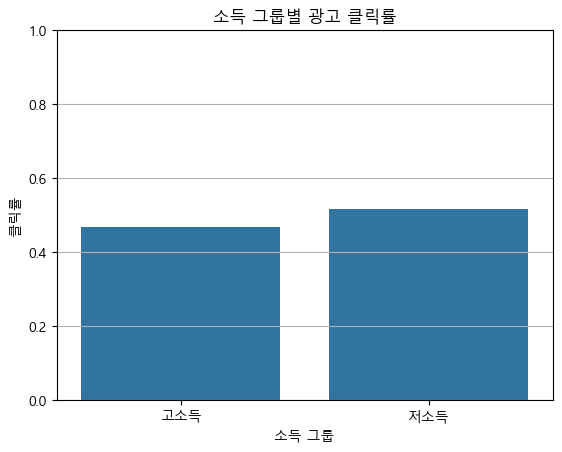

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

data['수입 그룹'] = ['저소득' if i < median_income else '고소득' for i in data['Area Income']]

click_rate = data.groupby('수입 그룹')['Clicked on Ad'].mean().reset_index()

sns.barplot(data = click_rate, x = '수입 그룹', y = 'Clicked on Ad')
plt.title('소득 그룹별 광고 클릭률')
plt.ylabel('클릭률')
plt.xlabel('소득 그룹')
plt.ylim(0, 1)
plt.grid(axis = 'y')
plt.show()

#### Cohen's h 계산

In [65]:
p1 = low_income['Clicked on Ad'].mean()
p2 = high_income['Clicked on Ad'].mean()

cohen_h = 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))
print("cohen's h: ", round(cohen_h, 4))

cohen's h:  0.0962


**효과 아주 작음**

### 6. 클릭 예측 모델 만들기

In [66]:
print(data)

      Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        62.26  32.0     69481.85                172.83   
1                        41.73  31.0     61840.26                207.17   
2                        44.40  30.0     57877.15                172.83   
3                        59.88  28.0     56180.93                207.17   
4                        49.21  30.0     54324.73                201.58   
...                        ...   ...          ...                   ...   
9995                     41.73  31.0     61840.26                207.17   
9996                     41.73  28.0     51501.38                120.49   
9997                     55.60  39.0     38067.08                124.44   
9998                     46.61  50.0     43974.49                123.13   
9999                     46.61  43.0     60575.99                198.45   

                               Ad Topic Line             City  Gender  \
0            Decentralized

### 7. 클러스터링 (비지도 학습)으로 유저 군집 나누기